In [15]:
# Add Matplotlib incline magic command
%matplotlib inline 

# Dependencies and Set up.
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Files to load.
city_data_to_load= "Resources/city_data.csv"
ride_data_to_load= "Resources/ride_data.csv"

In [17]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [19]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2018 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2018 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2018 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2018 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2018 6:26,42.81,5.327640e+12


In [20]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [21]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [22]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [23]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [30]:
# Get the number of data points from the Urban Cities.
sum(city_data_df["type"]=="Urban")

66

In [31]:
# Get the number of data points from the Suburban Cities.

sum(city_data_df["type"]=="Suburban")

36

In [33]:
# Get the number of data points from the Rural Cities.

sum(city_data_df["type"]=="Rural")

18

In [34]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [35]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [36]:
# Get the data types of each column.
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [38]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


In [42]:
# Create the Urban city DataFrame.
urban_cities_df= pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


In [44]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df= pyber_data_df[pyber_data_df["type"]== "Suburban"]
rural_cities_df= pyber_data_df[pyber_data_df["type"]== "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2018 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2018 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2018 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2018 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2018 8:57,51.80,4.018030e+12,2,Rural


In [45]:
# Get the number of rides for urban cities.
urban_ride_count= urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [47]:
# Create the suburban and rural ride count.
suburban_ride_count= suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count= rural_cities_df.groupby(["city"]).count()["ride_id"]


In [48]:
# Get the average fdare for each city in the urban cities.
urban_avg_fare= urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [49]:
# Get the average fare for each city in the suburban and rural cities.

suburban_avg_fare= suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare= rural_cities_df.groupby(["city"]).mean()["fare"]


In [50]:
# Get the average number of drivers for each urban city.
urban_driver_count= urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [51]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count= suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count= rural_cities_df.groupby(["city"]).mean()["driver_count"]


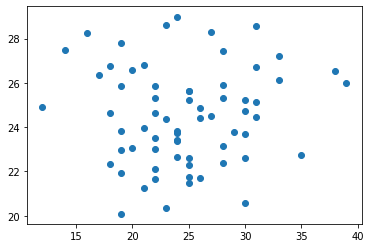

In [52]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

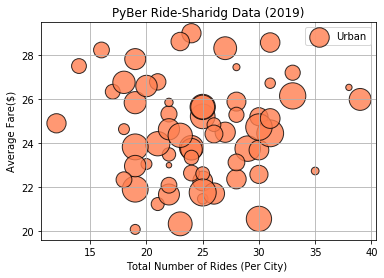

In [56]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, # increase the size factor by 10
            c="coral", # Add the color coral
            edgecolor="black", # add color to the edge
            linewidths=1, # add the line width
            alpha=0.8,
            label="Urban") # add the name of the label
# Add the title
plt.title("PyBer Ride-Sharidg Data (2019)")
# Add the y Label name
plt.ylabel("Average Fare($)")
# Add the X Label name
plt.xlabel("Total Number of Rides (Per City) ")
# Add the Grid to the Chart
plt.grid(True)
# Add the legend.
plt.legend()


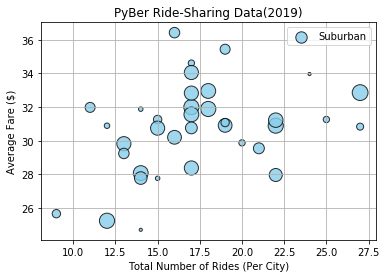

In [57]:
# Build the scatter plots for suburban cities.
# Matlab method.
plt.scatter(suburban_ride_count, # Creates the scatter plot.
           suburban_avg_fare,
            s=10*suburban_driver_count, # Increases the size factor to 10
            c="skyblue", # Fills in the color of the bubbles to sky blue
            edgecolor="black", # Makes the edge colors of the bubbles to be black.
            linewidth=1, # Inputs the line width to 1
            alpha=0.8,
            label="Suburban",) # Adds the Label name
# Adds the name of the title.
plt.title("PyBer Ride-Sharing Data(2019)")
# Adds the name for the y Label.
plt.ylabel("Average Fare ($)")
# Adds the name for the x Label.
plt.xlabel("Total Number of Rides (Per City)")
# Adds the Grid
plt.grid(True)
# Adds the legend.
plt.legend()      

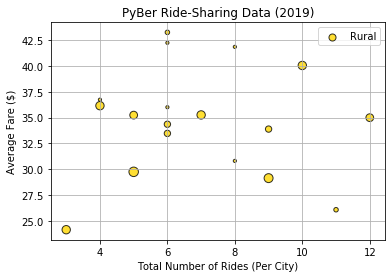

In [68]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, # Creates the scatter plot
      rural_avg_fare,
      s=10*rural_driver_count, # Increases the size factor to 10
      c="gold", # Sets the color of the bubbles to gold
      edgecolor="black", # Creates an edge on the bubbles and sets their color to black
      linewidths=1, # Sets the linewidths equal to 1
      alpha=0.8,
      label="Rural") # Sets the label description to Rural
# Creates the title
plt.title("PyBer Ride-Sharing Data (2019)")
# Adds the title description for the y label
plt.ylabel("Average Fare ($)")
# Adds the title description for the x label
plt.xlabel("Total Number of Rides (Per City)")
# Adds a Grid to the bubble chart
plt.grid(True)
# Add the legend.
plt.legend()

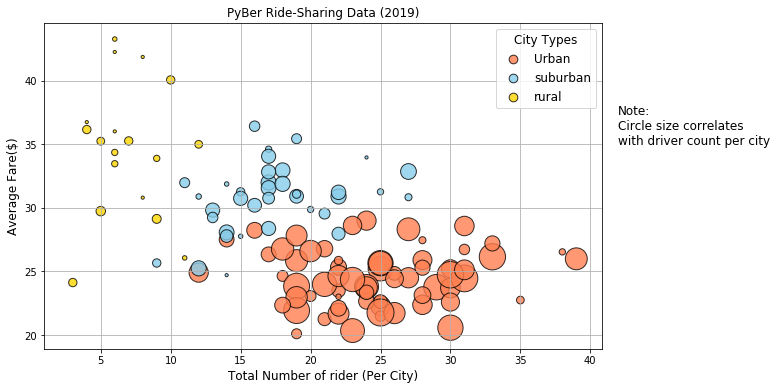

In [81]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, # Creates the scatter plot
           urban_avg_fare,
           s=10*urban_driver_count, # Increases the size factor to 1
           c="coral", # Changes the color of the bubble to coral
           edgecolor="black", # adds a black edge to the bubble
           linewidths=1, # sets the linewidth equal to 1
           alpha=0.8,
           label="Urban") # Sets the label equal to "urban"

# Creates the scatter plot for suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, # Increases the size factor to 1
           c="skyblue", # Changes the color of the bubble to skyblue
           edgecolor="black", # adds a black edge to the bubble
           linewidths=1, # sets the linewidth equal to 1
           alpha=0.8,
           label="suburban") # Sets the label equal to "suburban"

# Creates the scatter plot for rural
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, # Increases the size factor to 1
           c="gold", # Changes the color of the bubble to gold
           edgecolor="black", # adds a black edge to the bubble
           linewidths=1, # sets the linewidth equal to 1
           alpha=0.8,
           label="rural") # Sets the label equal to "rural"

# Incorporating the other Graph properties.

# Creating the title for the Graph and setting the Fontsize to 12
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=12)

# Creating the y-label Description and adjusting the Fontsize to 12
plt.ylabel("Average Fare($)", fontsize=12)
# Creating the x-label Description and adjusting the Fontsize to 12
plt.xlabel("Total Number of rider (Per City)", fontsize=12)

# Adding a Grid to the Graph.
plt.grid(True)

# Adding the Legend to the Graph
lgnd= plt.legend(fontsize="12", # Sets the fontsize
                mode="Expanded", # Expands the legend horizontally
                scatterpoints=1, # Sets the number of scatter points in the legend to be equal to 1
                loc="best", # Location set to "best" based on the plotting of the data points.
                title="City Types") # # Determining the title

# Incorporate a text label about circle size.
plt.text(42,35, "Note:\nCircle size correlates\nwith driver count per city",
        fontsize="12")

# Saves the figure into 
#C:\Users\Irvin M Godinez\Desktop\PyBer_Analysis\analysis .
plt.savefig("analysis/fig1.png")

# Determining the size for each legend individually.
lgnd.legendHandles[0]._sizes= [75] 
lgnd.legendHandles[1]._sizes= [75]
lgnd.legendHandles[2]._sizes= [75]

# Determining the size for the title of the legend
# Icreases size of the legend title to 12
lgnd.get_title().set_fontsize(12) 

# Show the plot
plt.show()
           


In [83]:
# Get summary statistics for Urban Cities.the output will show the count, 
# mean, standard deviation, minimum value, 25%, 50%, 
# and 75% percentiles, and maximum value from a DataFrame column that has numeric values.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [84]:
# Get summary statistics for Suburban Cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [85]:
# Get summary statistics for Rural Cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [87]:
# Get summary statistics for Urban Cities.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [88]:
# Get summary statistics for Suburban Cities.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [89]:
# Get summary statistics for Rural Cities.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [99]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [100]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [105]:
#Pandas method for finding the Mode.
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode()), round(suburban_ride_count.mode()), round(rural_ride_count.mode())

(0    22
 1    25
 dtype: int64, 0    17
 dtype: int64, 0    6
 dtype: int64)

In [114]:
# Calculate the measures of central tendency for the ride count for the urban cities.
# Gets the mean for Urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

# Gets the Median for Urban cities.
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

# Gets the Mode for Urban cities.
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [113]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
# Gets the mean for Suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

# Gets the median for Suburban cities.
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

# Gets the mode for Suburban cities.
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [112]:
# Calculate the measures of central tendency for the ride count for the rural cities.
# Gets the mean for Rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

# Gets the median for Rural cities.
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

# Gets the mode for Rural cities.
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [115]:
# Get the fares for the urban cities.
urban_fares= urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [121]:
# Calculate the measures of central tendency for the average fare for the urban cities.
#Getting the mean of Urban Cities.
mean_urban_fares= np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

#Getting the median of Urban Cities.
median_urban_fares= np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

#Getting the mode of Urban Cities.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_urban_fares= sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [123]:
# Get the fares for the urban cities.
rural_fares= rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [124]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the mean of Rural Cities.
mean_rural_fares= np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

#Getting the median of Rural Cities.
median_rural_fares= np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

#Getting the mode of Rural Cities.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_rural_fares= sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [125]:
# Get the fares for the suburban cities.
suburban_fares= suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [126]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the mean of Suburban Cities.
mean_suburban_fares= np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

#Getting the median of Suburban Cities.
median_suburban_fares= np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

#Getting the mode of Suburban Cities.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_suburban_fares= sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [127]:
# Get the driver count data from the Urban cities.
urban_drivers= urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [144]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the Mean of Urban Driver Count.
mean_urban_drivers= np.mean(urban_drivers)
print(f"The Mean for Urban Driver Count is ${mean_urban_drivers:.2f}.")

#Getting the Median of Urban Driver Count.
median_urban_drivers= np.median(urban_drivers)
print(f"The Median for Urban Driver Count is ${median_urban_drivers:.2f}.")

#Getting the mode of Urban Driver Count.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_urban_drivers= sts.mode(urban_drivers)
print(f"The mode for Urban Driver Count is {mode_urban_drivers}.")

The Mean for Urban Driver Count is $36.68.
The Median for Urban Driver Count is $37.00.
The mode for Urban Driver Count is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [130]:
# Get the driver count data from the Suburban cities.
suburban_drivers= suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [148]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the Mean of Suburban Driver Count.
mean_suburban_drivers= np.mean(suburban_drivers)
print(f"The mean for Suburban driver count is ${mean_suburban_drivers:.2f}.")

#Getting the Median of Suburban Driver Count.
median_suburban_drivers= np.median(suburban_drivers)
print(f"The median for suburban driver count is ${median_suburban_drivers:.2f}.")

#Getting the Median of Urban Driver Count.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_suburban_drivers= sts.mode(suburban_drivers)
print(f"The mode for Suburban driver count is {mode_suburban_drivers}.")

The mean for Suburban driver count is $13.71.
The median for suburban driver count is $16.00.
The mode for Suburban driver count is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [149]:
# Get the driver count data from the Suburban cities.
rural_drivers= rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [147]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the Mean of Rural Driver Count.
mean_rural_drivers= np.mean(rural_drivers)
print(f"The mean for Rural driver count is ${mean_rural_drivers:.2f}.")

#Getting the Median of Rural Driver Count.
median_rural_drivers= np.median(rural_drivers)
print(f"The median for Rural driver count is ${median_rural_drivers:.2f}.")

#Getting the Median of Rural Driver Count.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_rural_drivers= sts.mode(rural_drivers)
print(f"The mode for Rural driver count is {mode_rural_drivers}.")

The mean for Rural driver count is $4.30.
The median for Rural driver count is $4.00.
The mode for Rural driver count is ModeResult(mode=array([1], dtype=int64), count=array([32])).


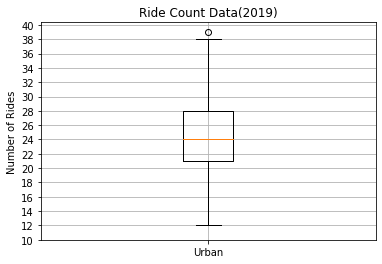

In [154]:
# Create a box-and-whisker plot for the Urban cities ride count.
x_labels=["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')

# Setting the tick for the Y label
ax.set_yticks(np.arange(10,41, step=2.0))

# Adds Grid
ax.grid()
plt.show()

In [155]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

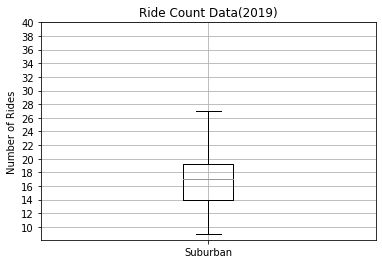

In [153]:
# Create a box-and-whisker plot for the Urban cities ride count.
x_labels=["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')

# Setting the tick for the Y label
ax.set_yticks(np.arange(10,41, step=2.0))

# Adds Grid
ax.grid()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

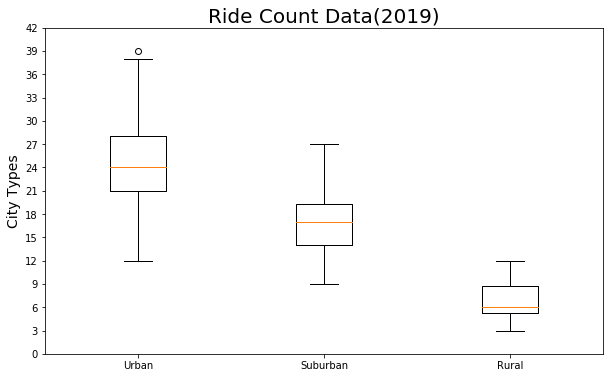

In [157]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban","Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax= plt.subplots(figsize=(10,6))

# Adds the title for the Whiskey Plot
ax.set_title('Ride Count Data(2019)',fontsize=20)

# Adds the y label Description and it's font size.
ax.set_ylabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))

# Adds the Grid
ax.grid
#Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show

In [158]:
# Get the city that matches 39
urban_city_outlier= urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier}has the highest rider count.")

West Angelahas the highest rider count.


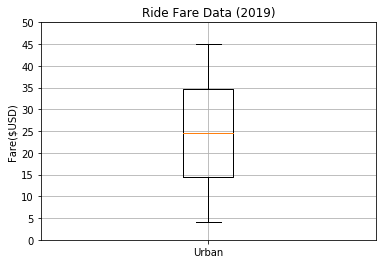

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [160]:
# Create a box-and-whisker plot for the urban fare dataD.
x_labels=["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title
ax.set_title('Ride Fare Data (2019)')
# Adds the y label description.
ax.set_ylabel('Fare($USD)')
# Sets the tick parameters on the y-axis. 
ax.set_yticks(np.arange(0,51, step=5.0))
# Adds a Grid to the Whisker Plot
ax.grid()
# Prints the Whisker Plot.
plt.show()
# Prints the Summary Statistics for Urban Fares.
print("Summary Statistics")
urban_fares.describe()


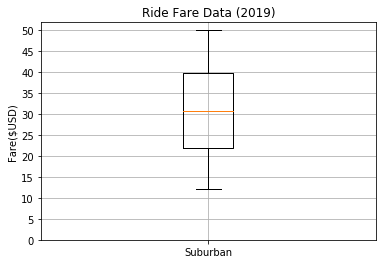

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [162]:
# Create a box-and-whisker plot for the Suburban fare data.
x_labels=["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_fares , labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
# Adds the y label description.
ax.set_ylabel('Fare($USD)')
# Sets the tick parameters on the y-axis.
ax.set_yticks(np.arange(0,51, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()
# Prints the Summary Statistics for Suburban Fares.
print("Summary Statistics")
suburban_fares.describe()


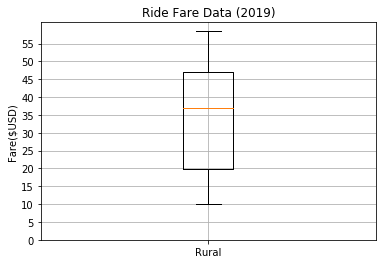

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [169]:
# Create a box-and-whisker plot for the Suburban fare data.
x_labels=["Rural"]
fig, ax= plt.subplots()
ax.boxplot(rural_fares , labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
# Adds the y label description.
ax.set_ylabel('Fare($USD)')
# Sets the tick parameters on the y-axis.
ax.set_yticks(np.arange(0,56, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()
# Prints the Summary Statistics for Suburban Fares.
print("Summary Statistics")
rural_fares.describe()


<function matplotlib.pyplot.show(*args, **kw)>

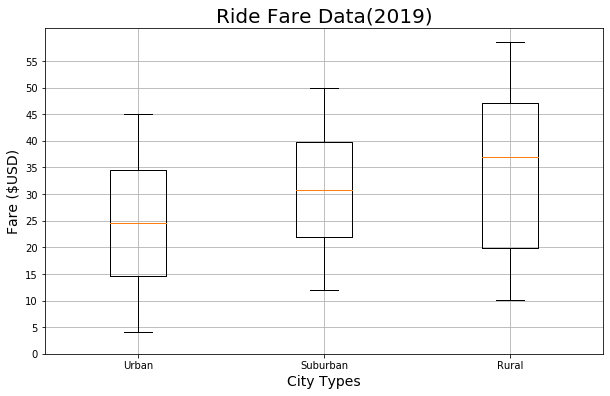

In [175]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban","Suburban", "Rural"]
ride_fare_data=[urban_fares, suburban_fares, rural_fares]
fig, ax= plt.subplots(figsize=(10,6))

# Adds the title for the Whiskey Plot
ax.set_title('Ride Fare Data(2019)',fontsize=20)

# Adds the y label Description and it's font size.
ax.set_ylabel("Fare ($USD)", fontsize=14)
# Sets the x label description to City Types.
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,56, step=5.0))

# Adds the Grid
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show

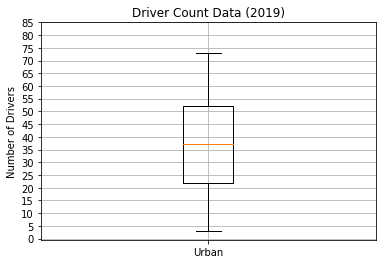

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [177]:
# Create the box-and_whisker plot for the Urban Driver Count Data.
x_labels=["Urban"]
fig, ax= plt.subplots()
# Creates the Whisker Box Plot for urban_drivers
ax.boxplot(urban_drivers, labels=x_labels)

# Adds the title.
ax.set_title('Driver Count Data (2019)')
# Sets the y-label description.
ax.set_ylabel('Number of Drivers')
# Sets the y-tick parameters
ax.set_yticks(np.arange(0,90, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()

# Prints the Summary Statistics for Urban Drivers.
print("Summary Statistics")
urban_drivers.describe()

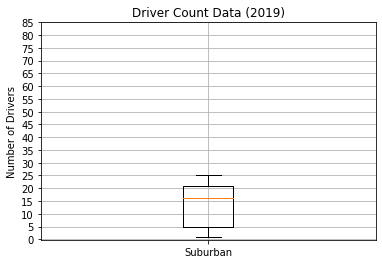

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [178]:
# Create the box-and_whisker plot for the Suburban Driver Count Data.
x_labels=["Suburban"]
fig, ax= plt.subplots()
# Creates the Whisker Box Plot for urban_drivers
ax.boxplot(suburban_drivers , labels=x_labels)

# Adds the title.
ax.set_title('Driver Count Data (2019)')
# Sets the y-label description.
ax.set_ylabel('Number of Drivers')
# Sets the y-tick parameters
ax.set_yticks(np.arange(0,90, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()

# Prints the Summary Statistics for Urban Drivers.
print("Summary Statistics")
suburban_drivers.describe()

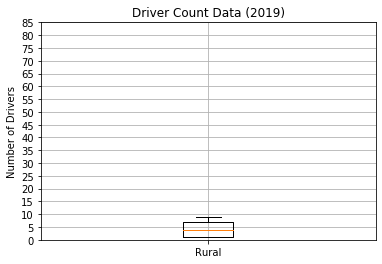

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [179]:
# Create the box-and_whisker plot for the Suburban Driver Count Data.
x_labels=["Rural"]
fig, ax= plt.subplots()
# Creates the Whisker Box Plot for urban_drivers
ax.boxplot(rural_drivers , labels=x_labels)

# Adds the title.
ax.set_title('Driver Count Data (2019)')
# Sets the y-label description.
ax.set_ylabel('Number of Drivers')
# Sets the y-tick parameters
ax.set_yticks(np.arange(0,90, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()

# Prints the Summary Statistics for Urban Drivers.
print("Summary Statistics")
rural_drivers .describe()

<function matplotlib.pyplot.show(*args, **kw)>

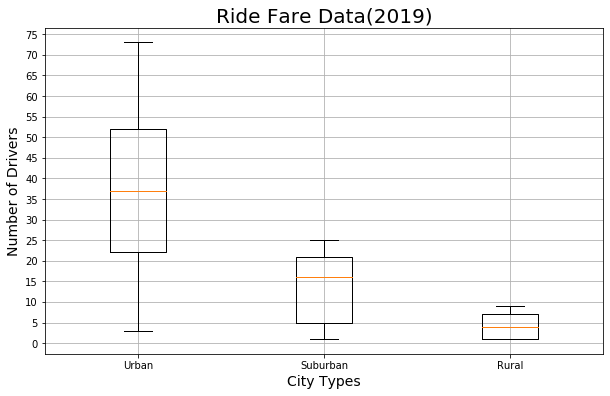

In [181]:
# Add all ride fares data on the box-and-whisker plots to the same graph.
x_labels=["Urban","Suburban", "Rural"]
ride_fare_data=[urban_drivers, suburban_drivers , rural_drivers]
fig, ax= plt.subplots(figsize=(10,6))

# Adds the title for the Whiskey Plot
ax.set_title('Ride Fare Data(2019)',fontsize=20)

# Adds the y label Description and it's font size.
ax.set_ylabel("Number of Drivers", fontsize=14)
# Sets the x label description to City Types.
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,76, step=5.0))

# Adds the Grid
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show

In [182]:
# Get the sum of the fares for each City Type.
sum_fares_by_type= pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [183]:
# Get the sum of all the Fares.
total_fares= pyber_data_df["fare"].sum()
total_fares

63538.64

In [185]:
# Calculate the percentage of fare for each City Type.
type_percents= 100* sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [186]:
# Doing the same Calculations as above all in one line.
type_percents= 100* pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

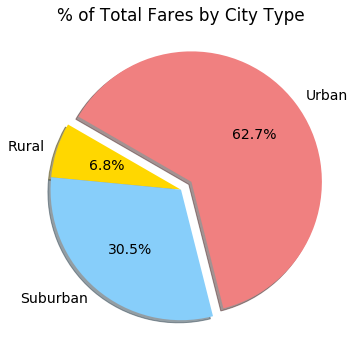

In [198]:
# Import mpl to change the plot configuration using rcParams.
# In order to use the rcParams function.
import matplotlib as mpl

# Build the Pie Chart.
plt.subplots(figsize=(10,6))

# Build the percentage of fares by City Type Pie Chart.
plt.pie(type_percents,
        labels=["Rural","Suburban","Urban"], # Setting the labels
        colors=["gold", "lightskyblue", "lightcoral"], # Setting the color choices.
        explode=[0,0,0.1], # Setting the Explotion on the largest column.
        autopct='%.1f%%',
        shadow=True, # Adding the shadow to the Chart.
        startangle=150)

# Adding the Title
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size']= 14

# Save the Figure.
plt.savefig("analysis/Fig5.png")

# Show the Figure
plt.show()

In [199]:
# Calculate the percentage of rides for each City Type.
ride_percents= 100* pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

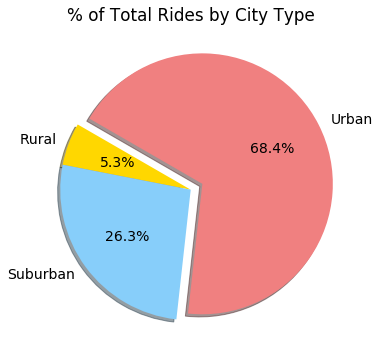

In [202]:
# Build the Pie Chart.
plt.subplots(figsize=(10,6))

# Build the percentage of fares by City Type Pie Chart.
plt.pie(ride_percents,
        labels=["Rural","Suburban","Urban"], # Setting the labels
        colors=["gold", "lightskyblue", "lightcoral"], # Setting the color choices.
        explode=[0,0,0.1], # Setting the Explotion on the largest column.
        autopct='%.1f%%',
        shadow=True, # Adding the shadow to the Chart.
        startangle=150)

# Adding the Title
plt.title("% of Total Rides by City Type")

# Setting the Font size to  14
mpl.rcParams['font.size']= 14

# Save the Figure.
plt.savefig("analysis/Fig6.png")

# Show the Figure
plt.show()